In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.model_selection import train_test_split
%matplotlib inline
mpl.style.use('ggplot')

In [70]:
df = pd.read_csv("heart.csv")

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


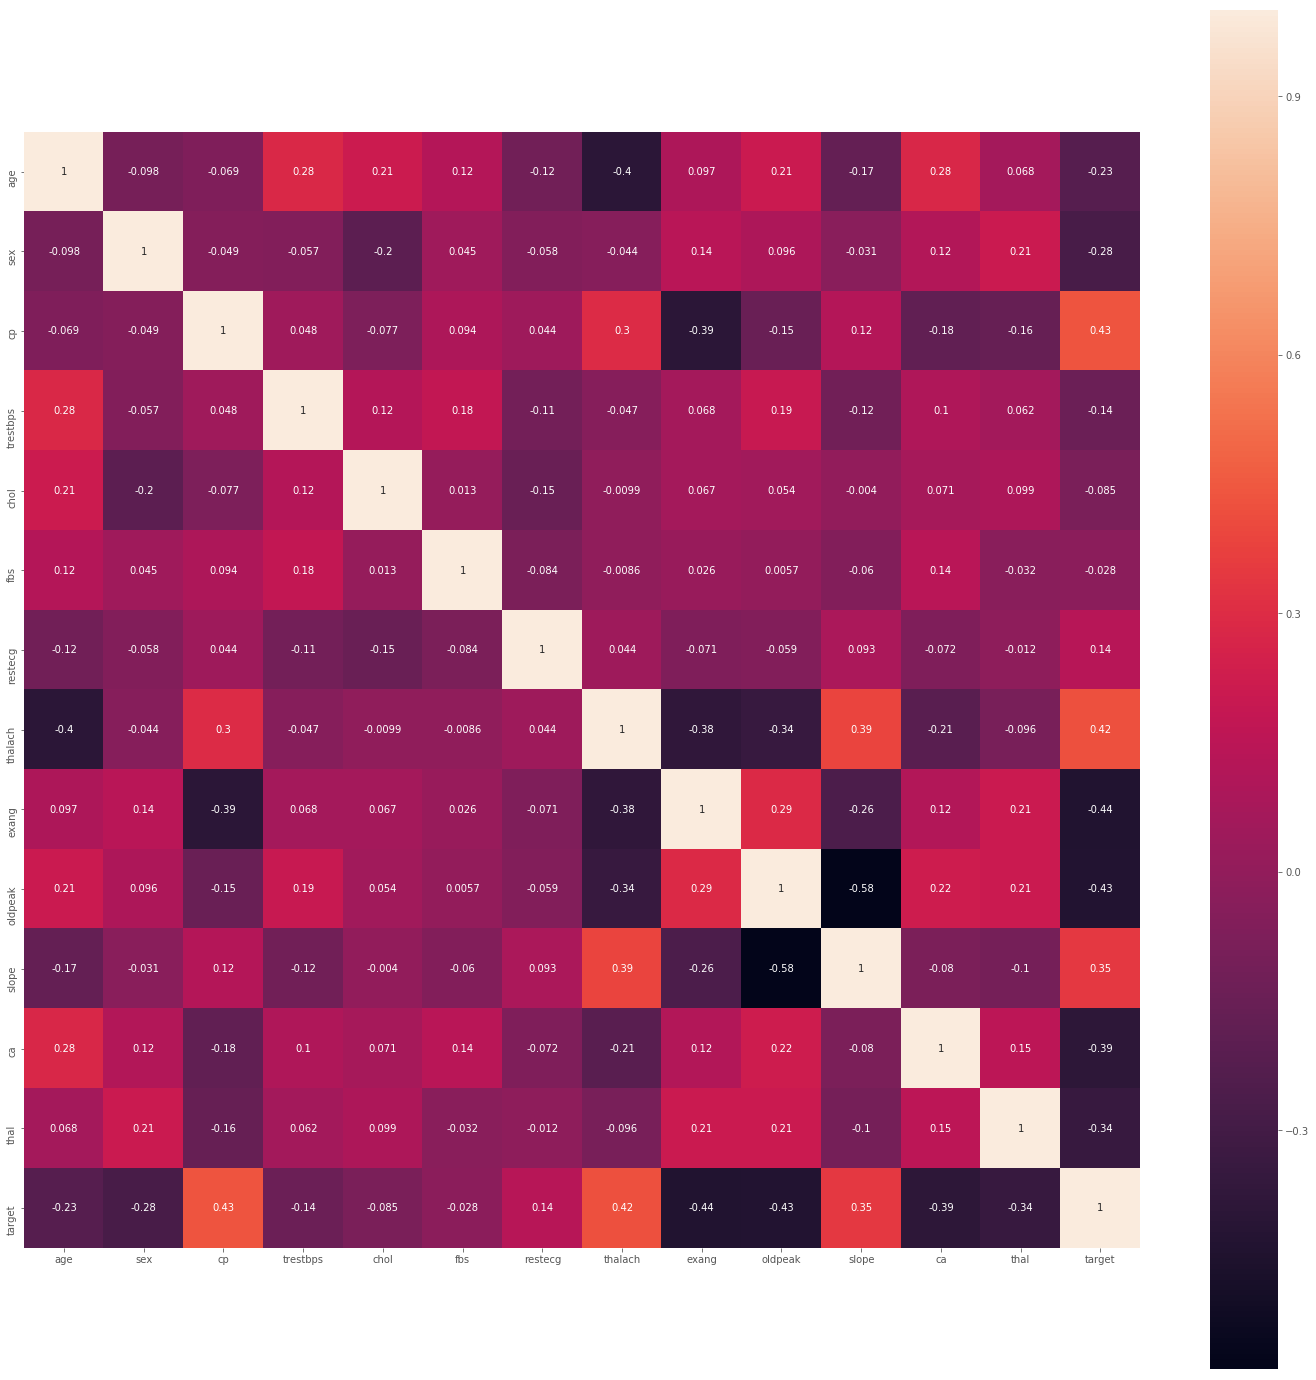

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(corrmat, vmax = 1, square=True, annot=True)

In [35]:
X = df.iloc[:,:13]
y = df.iloc[:, 13:]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_leaf_nodes=13, min_samples_leaf = 18, min_samples_split=15) 

In [42]:
model = clf.fit(X_train, y_train)

In [43]:
predictions = model.predict(X_test)

In [44]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[24,  9],
       [ 9, 34]], dtype=int64)

In [49]:
(24+34)/(24+9+9+34)

0.7631578947368421

In [5]:
df2 = pd.read_csv("heart.csv")

In [6]:
X = df2.iloc[:, :9]
y = df2.iloc[:,9]

In [7]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regr = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=13, min_samples_leaf = 18, min_samples_split=15)

In [10]:
model= regr.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test, predictions)

-0.2737454889152604

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mean_absolute_error(y_test,predictions)

0.8670302792096829

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y_test,predictions)

1.1805499243254964

In [21]:
import math
math.sqrt(mean_squared_error(y_test,predictions))#rmse

1.0865311428235715